Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


### Problem type - Regression


In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('avocado.csv')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.shape

(18249, 14)

In [5]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We dont have any missing value. only Date, type, region

In [7]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
data.isnull().sum()

# we dont have any column with null value

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### Preprocessing

In [9]:
data.drop('Unnamed: 0',axis=1,inplace=True)

Checking that 'Unnamed :0' is removed

In [10]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Date is object hence we will do some preprocessing

In [11]:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

In [12]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [13]:
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Month                    int64
Day                      int64
dtype: object

Lets visualize the data with scatter for better understaing of features and label

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

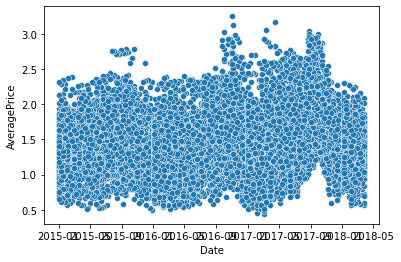

In [14]:
sns.scatterplot(x='Date',y='AveragePrice',data=data)

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

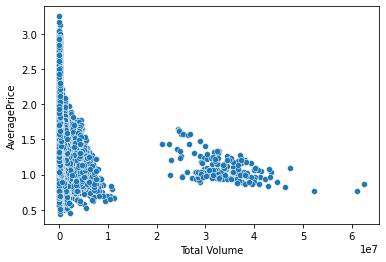

In [15]:
sns.scatterplot(x='Total Volume',y='AveragePrice',data=data)

<AxesSubplot:xlabel='4046', ylabel='AveragePrice'>

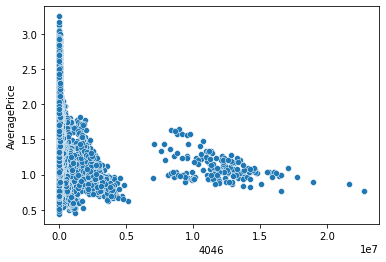

In [16]:
sns.scatterplot(x='4046',y='AveragePrice',data=data)

<AxesSubplot:xlabel='4225', ylabel='AveragePrice'>

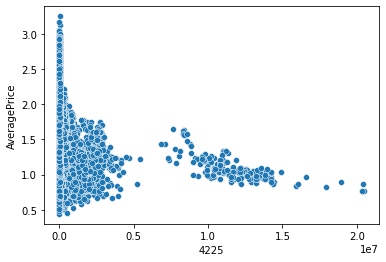

In [17]:
sns.scatterplot(x='4225',y='AveragePrice',data=data)

<AxesSubplot:xlabel='4770', ylabel='AveragePrice'>

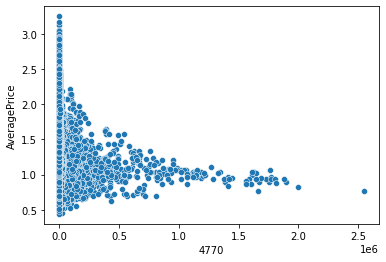

In [18]:
sns.scatterplot(x='4770',y='AveragePrice',data=data)

<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

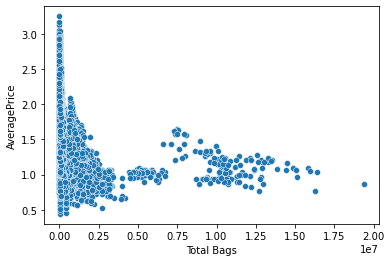

In [19]:
sns.scatterplot(x='Total Bags',y='AveragePrice',data=data)

<AxesSubplot:xlabel='Small Bags', ylabel='AveragePrice'>

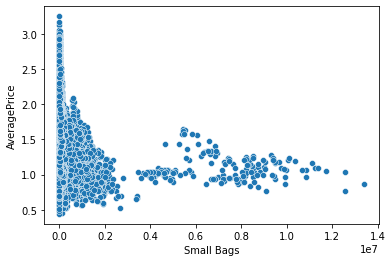

In [20]:
sns.scatterplot(x='Small Bags',y='AveragePrice',data=data)

<AxesSubplot:xlabel='Large Bags', ylabel='AveragePrice'>

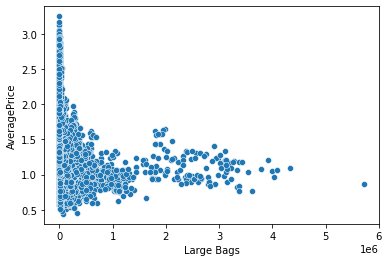

In [21]:
sns.scatterplot(x='Large Bags',y='AveragePrice',data=data)

<AxesSubplot:xlabel='XLarge Bags', ylabel='AveragePrice'>

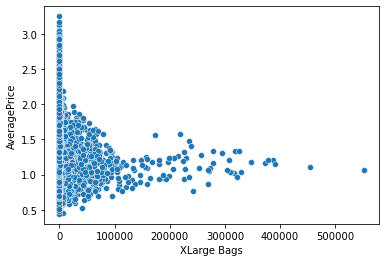

In [22]:
sns.scatterplot(x='XLarge Bags',y='AveragePrice',data=data)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

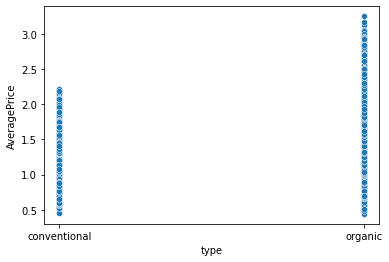

In [23]:
sns.scatterplot(x='type',y='AveragePrice',data=data)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

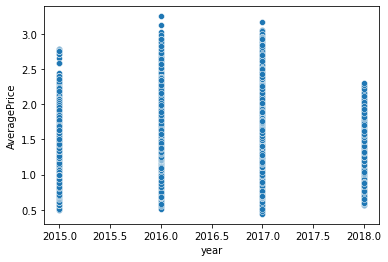

In [24]:
sns.scatterplot(x='year',y='AveragePrice',data=data)

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

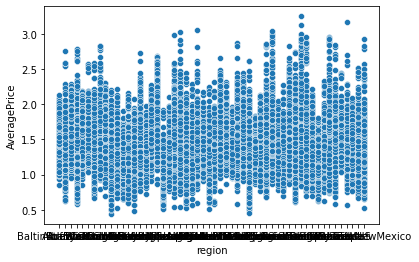

In [25]:
sns.scatterplot(x='region',y='AveragePrice',data=data)

In [26]:
data_feature = data.drop(columns = 'AveragePrice')

In [27]:
data_feature

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [28]:
# Checking correlation
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


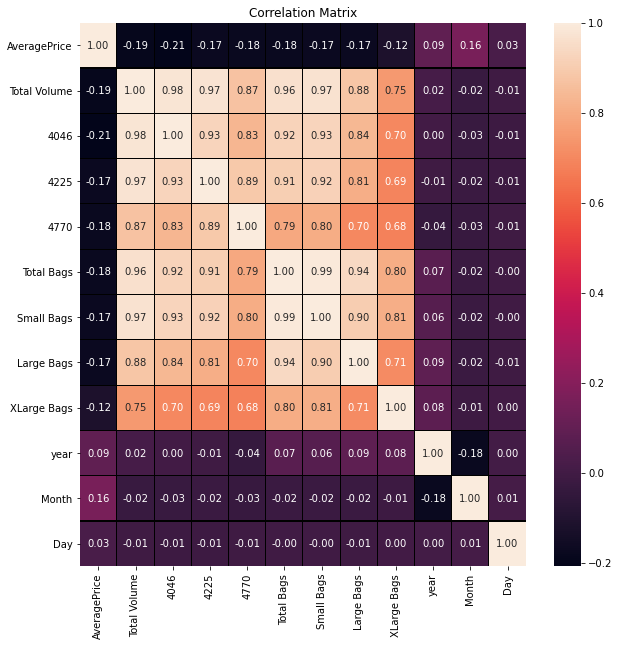

In [29]:
corr_mat = data.corr()

# Size of the canvasa
plt.figure(figsize=[10,10])

# plot the correlation matrix
sns.heatmap(corr_mat, annot=True, linewidths=0.2, linecolor='black',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Average Price is influenced by every feature except year, we will consider to remove year but it need more study

#### Checking outliers

In [30]:
#define a function plot_boxplot

def plot_boxplot(df,Ft):
    df.boxplot(column = [Ft])
    plt.grid(False)
    plt.show()


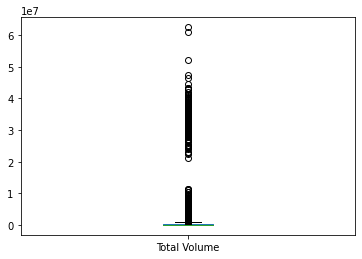

In [31]:
plot_boxplot(data,"Total Volume" )

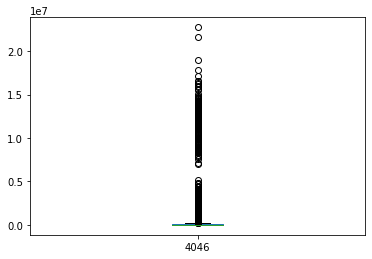

In [32]:
plot_boxplot(data, '4046')

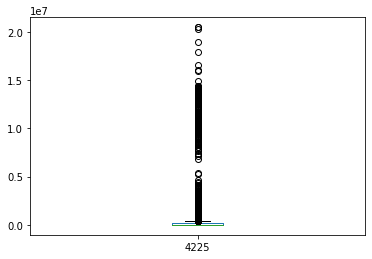

In [33]:
plot_boxplot(data,'4225' )

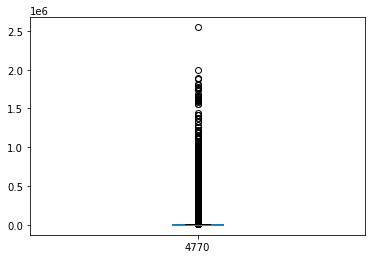

In [34]:
plot_boxplot(data, '4770')

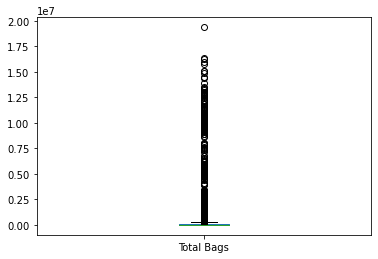

In [35]:
plot_boxplot(data,'Total Bags' )

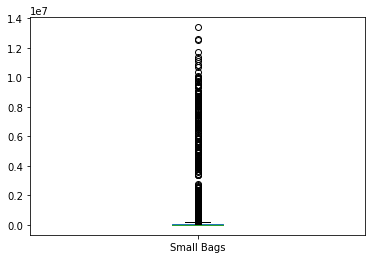

In [36]:
plot_boxplot(data,'Small Bags' )

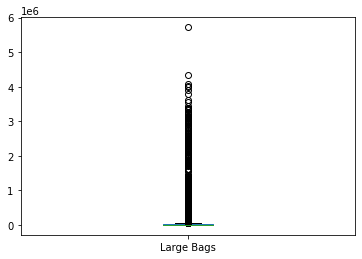

In [37]:
plot_boxplot(data,'Large Bags' )

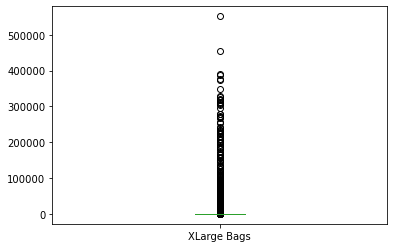

In [38]:
plot_boxplot(data,'XLarge Bags' )

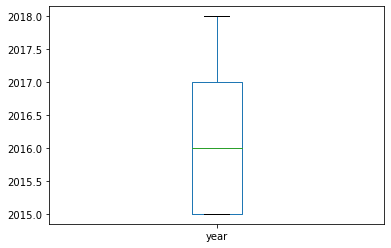

In [39]:
plot_boxplot(data,'year' )

Text(0.5, 1.0, 'AveragePrice')

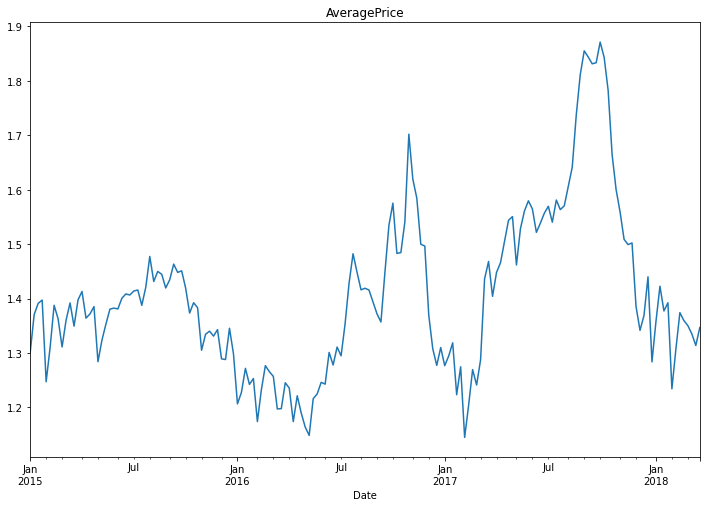

In [40]:
byDate = data.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('AveragePrice')

# Should i remove the outlier?
**According to boxplot image, majority of points are outside the upper limit. If i remove the outlier then i willl lose most of the data and the dataset might also get useless, so i feel i should not remove the outlier.**

from scipy.stats import zscore

import numpy as np

data = np.abs(zscore(data)) # i created a new dataframe using this. 

dataz = pd.DataFrame(data)

#threshold=3

#np.where(z>3)

dataz[dataz<3].head()

In [41]:
#converted the type in numerical and removed the date and regipon
data1 = pd.get_dummies(data.drop(['region','Date'],axis=1),drop_first=True)

In [42]:
data1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


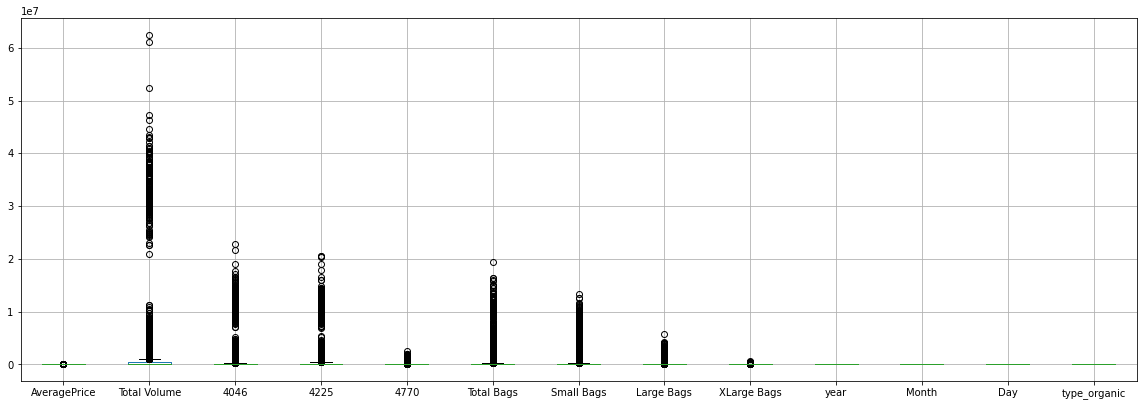

In [43]:
# Plotting boxplots for all columns
data1.iloc[:,0:15].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

#Now checking data distributio


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

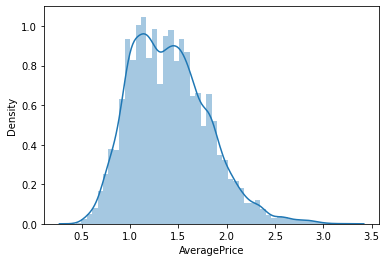

In [44]:
sns.distplot(data1['AveragePrice'])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

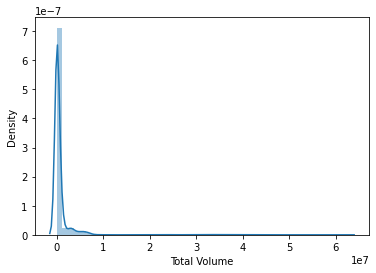

In [45]:
sns.distplot(data1[ 'Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

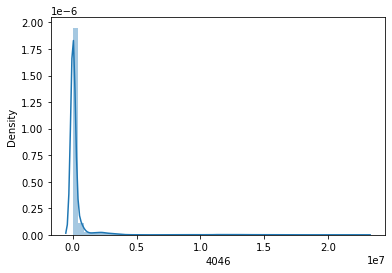

In [46]:
sns.distplot(data1[ '4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

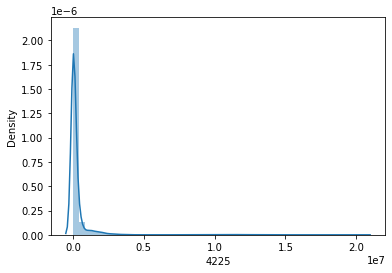

In [47]:
sns.distplot(data1[ '4225'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

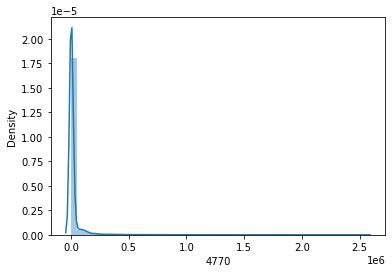

In [48]:
sns.distplot(data1['4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

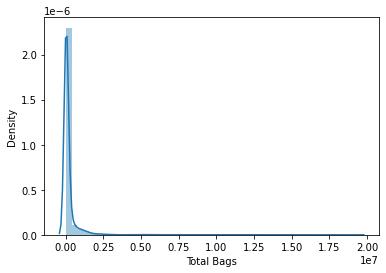

In [49]:
sns.distplot(data1['Total Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

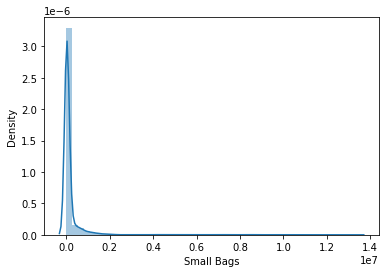

In [50]:
sns.distplot(data1[ 'Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

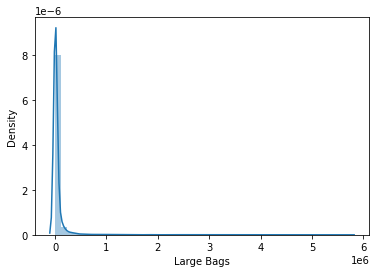

In [51]:
sns.distplot(data1['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

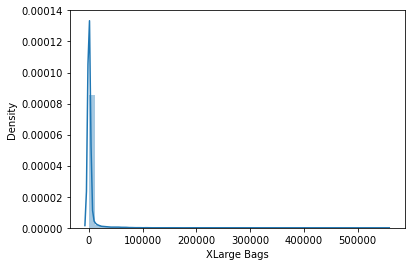

In [52]:
sns.distplot(data1['XLarge Bags'])

<AxesSubplot:xlabel='year', ylabel='Density'>

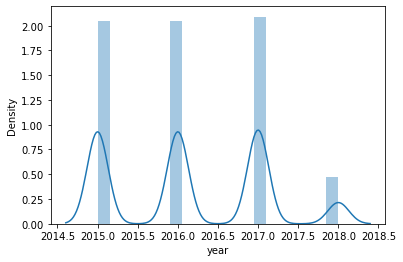

In [53]:
sns.distplot(data1['year'])

In [54]:
data1.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
type_organic     0.000329
dtype: float64

In [55]:
data1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


In [68]:
data1x = data1.drop(columns='AveragePrice', axis=1)

In [70]:
data1y = data1['AveragePrice']

In [71]:
# Data scaling. Formula Z = (X- mean)/std

scaler = StandardScaler()
datasc = scaler.fit_transform(data1x)
data1xsc = pd.DataFrame(datasc)
data1xsc

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-1.221282,1.647632,1.291857,-0.999836
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-1.221282,1.647632,0.494231,-0.999836
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-1.221282,1.647632,-0.303396,-0.999836
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-1.221282,1.647632,-1.101022,-0.999836
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-1.221282,1.364669,1.519750,-0.999836
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.970504,-1.181997,-1.328915,1.000164
18245,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.970504,-1.464959,1.405803,1.000164
18246,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.970504,-1.464959,0.608177,1.000164
18247,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.970504,-1.464959,-0.189449,1.000164


Here we have a target and other feature, Let use this

In [72]:
data1y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

we go to spitting the training and testing data

In [75]:
from sklearn.model_selection import train_test_split
data1xsc_train, data1xsc_test, y_train, y_test = train_test_split(data1xsc,y,test_size = 0.2, random_state=100)
y_train.head()

16292    1.68
13750    1.45
4498     1.24
16026    2.09
2258     1.29
Name: AveragePrice, dtype: float64

**we go to Model instantiating and training the data**

In [77]:
# target Average Price is a cpntinuous data so Linear regression is usefull
from  sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(data1xsc_train, y_train)



LinearRegression()

In [96]:
y_pred = regression.predict(data1xsc_test)

In [97]:
y_pred

array([1.74876423, 1.71009573, 1.75391694, ..., 1.27819833, 1.68713423,
       1.59068031])

In [78]:
# Predict the AvgPrice
data1.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,1


In [103]:
print('Prediction of price :',regression.predict(scaler.transform([[7000.0, 2000.0, 1500.0, 0.0, 8000.5, 3004.04, 430.0, 0.0, 2018, 2, 4,1]])))

Prediction of price : [-24.44579912]


In [93]:
# saving the model to the local file system
import pickle
filename = 'AvgPrice_model.pickle'
pickle.dump(regression, open(filename,'wb'))

# prediction using the saved model
loaded_model = pickle.load(open(filename,'rb'))

a = loaded_model.predict(scaler.transform([[16785.0, 1865.0, 1485.0, 801.5, 8547.5, 8529.04, 344.8, 0.0, 2018, 2, 28, 1]]))

a

array([3.17538202])

In [94]:
# Lets check how well my model fit the data . will check through adjjusted R2 score
regression.score(data1xsc_train,y_train)

0.43888131364019645

My model has only 43% confidence

**Model Evaluation**

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.23463886733597272

This error rate is too high, it shows that our model is not perfect

In [108]:
mean_squared_error(y_test, y_pred)

0.09342412133065724

**All though our accuracy score is very low, still lets check the overfitting of model**

In [81]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividing by the L2-norm

from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV

lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(data1xsc_train, y_train)

LassoCV(normalize=True)

In [82]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

2.0440797486875386e-06

In [84]:
# now that we have best parameter, let's use lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(data1xsc_train, y_train)

Lasso(alpha=2.0440797486875386e-06)

In [86]:
lasso_reg.score(data1xsc_test, y_test)

0.4385128440130228

In [88]:
# Using Ridge regression model
#  RidgeCV will return best alpha and coefficients after performing 10 corss  validations.

ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.01), normalize = True)
ridgecv.fit(data1xsc_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [89]:
ridgecv.alpha_

0.001

In [90]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(data1xsc_train, y_train)

Ridge(alpha=0.001)

In [91]:
ridge_model.score(data1xsc_test, y_test)

0.43851481291638117

### No where i am getting any score more than 44%. It can't be said to be a good model